<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/CN_unidade4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 4 - Aproximação de funções




Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: a **Interpolação** e o **Método dos Mínimos Quadrados**. A seguir, apresentamos alguns exemplos de resolução em *Python*. Vamos utilizar as bibliotecas [numpy](https://numpy.org/) e [scipy](https://scipy.github.io/devdocs/index.html).

# Interpolação

**Forma de Newton**

Algoritmo - Tabela de Diferenças Divididas



1.   Dados $x_i$ e $f(x_i)$,  $n+1$ pontos.
2.   Para $i=0:n$
3.   $\hspace{1pc}$  $d_{i0}=f(x_i)$
4.   Para $k = 1:n$
5.   $\hspace{1pc}$ Para $i=0:n-k$
6.   $\hspace{2pc} d_{ik}=\dfrac{d_{i+1,k-1}-d_{i,k-1}}{x_{i+k}-x_i}$


O polinômio é dado por 

$$p(x) = f[x_0]+f[x_0,x_1](x-x_0)+f[x_0,x_1,x_2](x-x_0)(x-x_1)+\ldots+f[x_0,x_1,\ldots,x_{n-1},x_n](x-x_0)(x-x_1)\ldots(x-x_{n-1}),$$

onde $f[x_0]=f(x_0)$ e para qualquer $k$, $$f[x_0,x_1,\ldots,x_k,x]=\dfrac{f[x_0,x_1,\ldots,x_{k-1},x]-f[x_0,x_1,\ldots,x_k]}{x-x_k}$$






In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [70]:
def f(x):
  return(1/(1+x**2))

def dif_div(x,y):
  n = len(x)
  d = np.zeros((n,n))
  c = np.zeros(n)

  for i in range(n):
    d[i,0] = y[i]
  for k in range(1,n):
    for i in range(n-k):
      d[i,k] = (d[i+1,k-1] - d[i,k-1])/(x[i+k] - x[i])

  for i in range(n):
    c[i] = d[0,i]

  return(c)



In [104]:
N = 11
a = -4
b = 4
h = (b-a)/(N-1)
x = np.arange(a, b+h, h)
y = f(x)

c = dif_div(x, y)
print(c)

[ 0.05882353  0.03768055  0.02251295  0.01471103  0.00780092 -0.00847029
 -0.00062481  0.00280052 -0.00156468  0.0005304  -0.0001326 ]


In [105]:
def p(x0, x, c):
  n = len(c)
  vp = np.zeros(n)
  vp[0] = c[0]
  ss = 1
  px0 = 0
  for i in range(1,n):
    ss *= (x0 - x[i-1])
    vp[i] = c[i]*ss
  for i in range(n):
    px0 += vp[i] 
  return px0



**Exemplo** (Fenômeno de Runge)

Seja $$f(x)=\dfrac{1}{1+x^2}, x\in(-4,4)$$

Para $n$ inteiro, $p_n(x)$ é o polinômio interpolador de $f(x)$ nos pontos igualmente espaçados $x_0,x_1,\ldots,x_n$, dados por $x_i=-4 + i\cdot h$ e $h = 8/n$. Note que aumentarmos o número de pontos o erro aumenta.



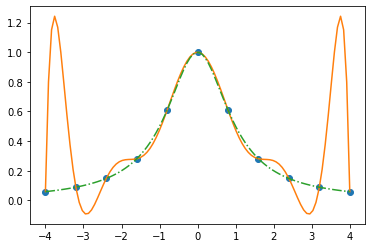

In [108]:
x_pol = np.linspace(a, b, 100)
y_pol = np.zeros(len(x_pol))
f_pol = np.zeros(len(x_pol))
for i in range(len(x_pol)):
  y_pol[i] = p(x_pol[i], x, c)
  f_pol[i] = f(x_pol[i])
#print(x_pol)
#print(y_pol)

plt.figure(1)
plt.plot(x, y, 'o')
plt.plot(x_pol, y_pol)
plt.plot(x_pol, f_pol, '-.')
plt.show()

Uma solução é utilizar a interpolação por partes.

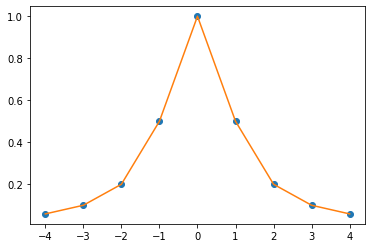

In [57]:
import matplotlib.pyplot as plt

from scipy import interpolate

#xx = np.arange(-5,5,0.1)
#m = len(xx)
#yy = np.zeros(m)
#yy = f(xx)
a = -4
b = 5
x = np.arange(a, b)
n = len(x)
y = np.zeros(n)
y = f(x)

p = interpolate.interp1d(x, y)

xnew = np.arange(a, b)

ynew = p(xnew)   

plt.plot(x, y, 'o', xnew, ynew, '-')


plt.show()